In [1]:
# blab init
import blab
startup_notebook = blab.blab_startup()
%run $startup_notebook

blab init
blab found local libs at /media/me/DATA/Dropbox/31_Projekte/01_Python/libs
Start Time: 18:16:25


time: 418 ms (started: 2022-10-31 18:16:25 +01:00)


# Scale Numbers
* `scale`: Scales all values of a numeric series to a defined value range.<br>
   Available methods: max_abs, min_max, min_max_robust, rel, mean, median, 
   compare_median, rank and random.

In [2]:
import numpy      as np
import pandas     as pd 
import bpyth      as bpy
import pandasklar as pak 
import random

time: 1.36 s (started: 2022-10-31 18:16:25 +01:00)


In [3]:
?pak.scale

time: 77.9 ms (started: 2022-10-31 18:16:27 +01:00)


Signature: pak.scale(series, method, powerfactor=1, almostzero=1e-08, verbose=None)
Docstring:
Scales all values of a numeric series to a defined value range.
* method must be 'max_abs','min_max','min_max_robust',
  'rel','mean','median','compare_median','rank' or 'random'
* powerfactor is an additional parameter for scaling 'rank'

## scale method='max_abs'
* scales every value with a fixed factor
* one finds: Every scaled value is somewhere in the range -1..1
* series_scaled.max() is often 1
* series_scaled.min() can be anything -1..0.999    

## scale method='min_max'
* forces all scaled values to fit the full range 0..1 (closed interval)
* one finds: series_scaled.min() == 0
* one finds: series_scaled.max() == 1 if there are more than 2 different values

## scale method='min_max_robust'
* like min_max, but robust against outlier values. 
  Works with quantile(0.01) and quantile(0.99) instead of min() and max().
  The scaling is therefore not determined by the outliers.
* scales 98%

In [4]:
?pak.random_series

time: 33.9 ms (started: 2022-10-31 18:16:27 +01:00)


Signature: pak.random_series(size, typ, **kwargs)
Docstring:
Returns a series of random data. 
* size
* typ: 'int', 'float', 'string', 'name', 'choice', 'list', 'mix',
       'ascending', 'descending', 'perlin' or 'errorprone'. Or the first letter of this.
       'name' generates random first names, 'list' generates lists of random first names.
       'mix' generates mixed datatypes. 
       'ascending', 'descending' and 'perlin' generates ordered random sequences.
       'errorprone' generates sequences of NaNs, 0, 1 with similar index. Useful for testing. 

The other arguments are passed to the appropriate functions for the type of random data.
General arguments are:
* name
* p_nan: value 0..1 specifies  how many NaNs are interspersed
* p_dup: value 0..1 determines how many Dups are included.

There are extra parameters for some types of random data:
- int:    min, max: closed interval, min and max are both possible values in the generated data
- float:  decimals: how many decimal pl

min = -0.2474953332469324
max = -0.20031588783173934


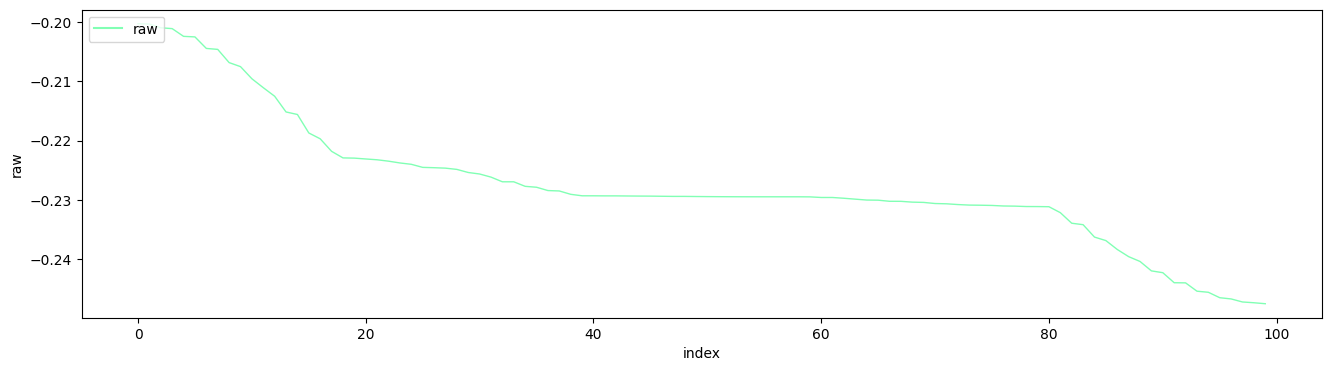

time: 1.75 s (started: 2022-10-31 18:16:27 +01:00)


In [5]:
# Create raw data with ugly scaling

def create_raw():
    typ = random.choice([ 'a','d'])
    raw = pak.random_series(100, typ, name='raw') 
    raw = pak.scale(raw, 'random')    
    df = pak.dataframe(raw)
    return df


# display
df = create_raw()
print(  'min =',df.raw.min() )
print(  'max =',df.raw.max() )
%matplotlib inline
pak.plot(df)

In [6]:
# show statistics for raw and scaled data

def analyse():
    a = pak.analyse_values(df) #.set_index('col_name')
    spalten = ['col_name','vmin','vmean','vmedian','vmax','vsum']
    a = a[spalten] 
    mask = ~a.col_name.isin(['__index__','x'])
    return a[mask].set_index('col_name')

analyse()

,vmin,vmean,vmedian,vmax,vsum
col_name,,,,,
raw,-0.25,-0.23,-0.23,-0.2,-22.74


time: 66.7 ms (started: 2022-10-31 18:16:29 +01:00)


## scale method='max_abs'
* scales every value with a fixed factor
* one finds: Every scaled value is somewhere in the range `-1..1`
* series_scaled.max() is often `1`
* series_scaled.min() can be anything `-1..0.999`

In [7]:
# scale
df['max_abs'] = pak.scale( df.raw, 'max_abs')

time: 42.7 ms (started: 2022-10-31 18:16:29 +01:00)


In [8]:
# assert
assert (df.max_abs >= -1).all()
assert (df.max_abs <=  1).all()

time: 37.7 ms (started: 2022-10-31 18:16:29 +01:00)


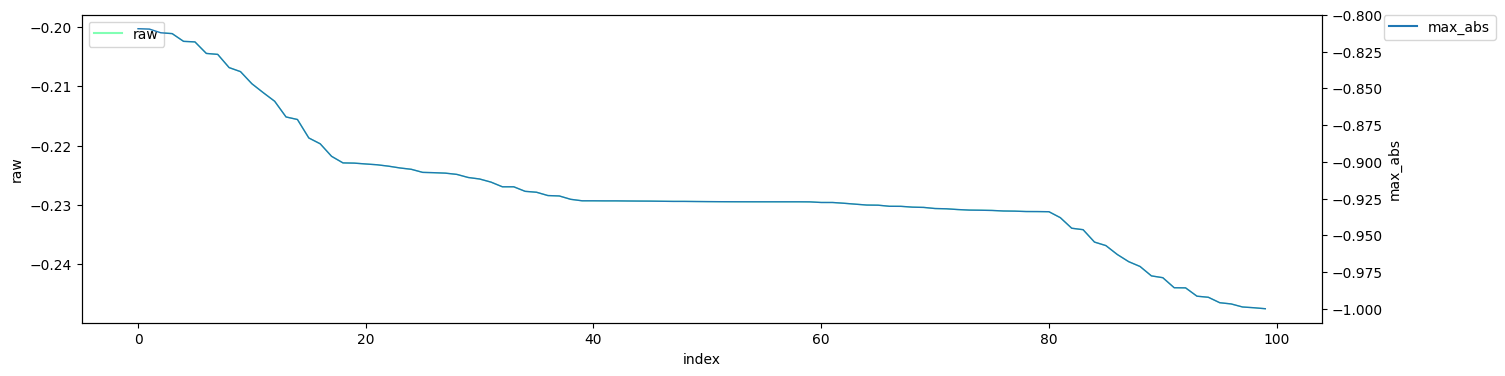

time: 3.34 s (started: 2022-10-31 18:16:29 +01:00)


In [9]:
# display (plots are on top of each other, see scaling on both y-axis)
pak.plot(df.raw, df.max_abs )

In [10]:
analyse()

,vmin,vmean,vmedian,vmax,vsum
col_name,,,,,
raw,-0.25,-0.23,-0.23,-0.20,-22.74
max_abs,-1.00,-0.92,-0.93,-0.81,-91.87


time: 81.9 ms (started: 2022-10-31 18:16:32 +01:00)


## scale method='min_max'
* forces all scaled values to fit the full range `0..1` (closed interval)
* one finds: `series_scaled.min() == 0`
* one finds: `series_scaled.max() == 1`

In [11]:
# scale
df['min_max'] = pak.scale( df.raw, 'min_max')

time: 36.3 ms (started: 2022-10-31 18:16:32 +01:00)


In [12]:
# assert
assert df.min_max.min() == 0
assert df.min_max.max() == 1

time: 37.8 ms (started: 2022-10-31 18:16:32 +01:00)


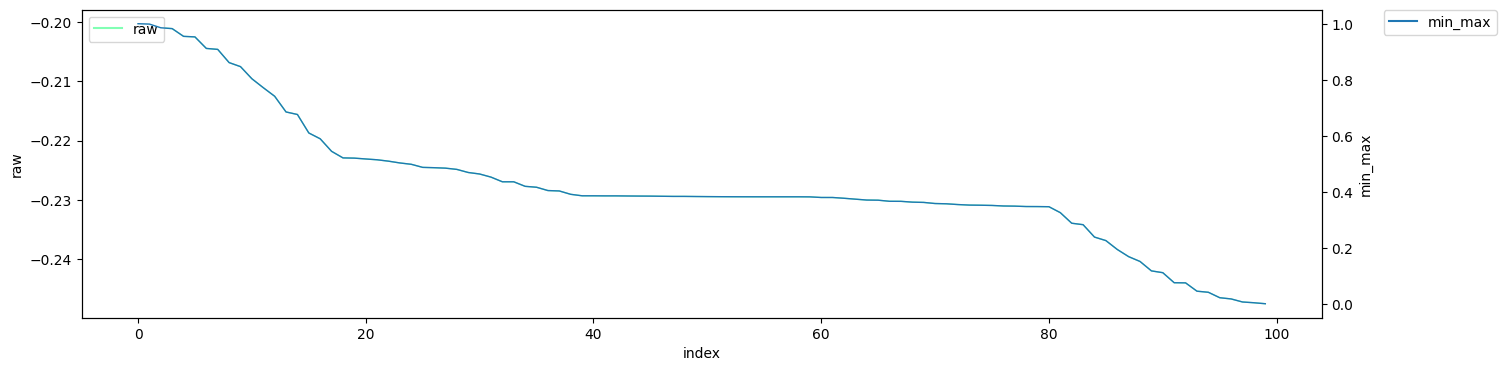

time: 3.15 s (started: 2022-10-31 18:16:32 +01:00)


In [13]:
# display (plots are on top of each other, see scaling on both y-axis)
pak.plot(df.raw, df.min_max )

In [14]:
analyse()

,vmin,vmean,vmedian,vmax,vsum
col_name,,,,,
raw,-0.25,-0.23,-0.23,-0.20,-22.74
max_abs,-1.00,-0.92,-0.93,-0.81,-91.87
min_max,0.00,0.43,0.38,1.00,42.63


time: 56.1 ms (started: 2022-10-31 18:16:36 +01:00)


## scale method='min_max_robust'
* like `min_max`, but robust against outlier values. 
  Works with `quantile(0.01)` and `quantile(0.99)` instead of `min()` and `max()`.
  The scaling is therefore not determined by the outliers.
* scales 98% of the values to fit the range `0..1`
* one finds: `series_scaled.min() <= 0` but not much lower  than -0.02 normally
* one finds: `series_scaled.max() >= 1` but not much higher than  1.02 normally

In [15]:
# scale
df['min_max_robust'] = pak.scale( df.raw, 'min_max_robust')

time: 27.9 ms (started: 2022-10-31 18:16:36 +01:00)


In [16]:
# assert
assert df.min_max_robust.min() <= 0
assert df.min_max_robust.max() >= 1

time: 30.2 ms (started: 2022-10-31 18:16:36 +01:00)


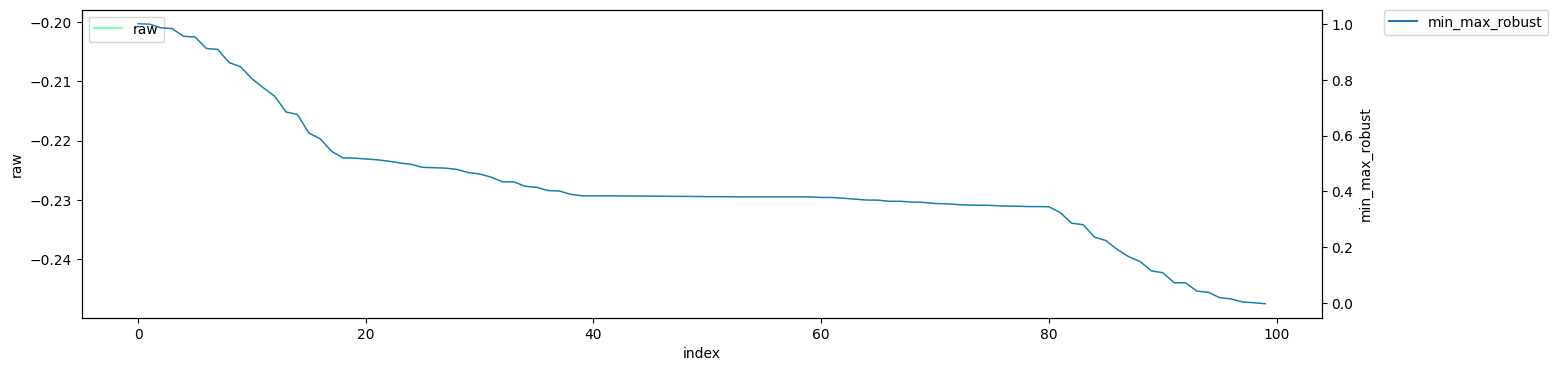

time: 3.2 s (started: 2022-10-31 18:16:36 +01:00)


In [17]:
# display (plots are on top of each other, see scaling on both y-axis)
pak.plot(df.raw, df.min_max_robust )

In [18]:
analyse()

,vmin,vmean,vmedian,vmax,vsum
col_name,,,,,
raw,-0.25,-0.23,-0.23,-0.20,-22.74
max_abs,-1.00,-0.92,-0.93,-0.81,-91.87
min_max,0.00,0.43,0.38,1.00,42.63
min_max_robust,-0.00,0.42,0.38,1.00,42.48


time: 57.4 ms (started: 2022-10-31 18:16:39 +01:00)


## scale method='rel'
* scales every value with a fixed factor so that
* `series_scaled.sum() == 1`  or  `series_scaled.sum() == -1` 
* therefore, this scaling is well suited for frequencies, the numerical values are then the relative frequencies
* `series_scaled.min()`  and  `series_scaled.max()` are numbers near `0`

In [19]:
# scale
df['rel'] = pak.scale( df.raw, method='rel')

time: 33.3 ms (started: 2022-10-31 18:16:39 +01:00)


In [20]:
# assert
assert abs( abs(df.rel.sum()) - 1 ) < 0.000000001  # .sum() == 1 or -1

time: 34.6 ms (started: 2022-10-31 18:16:39 +01:00)


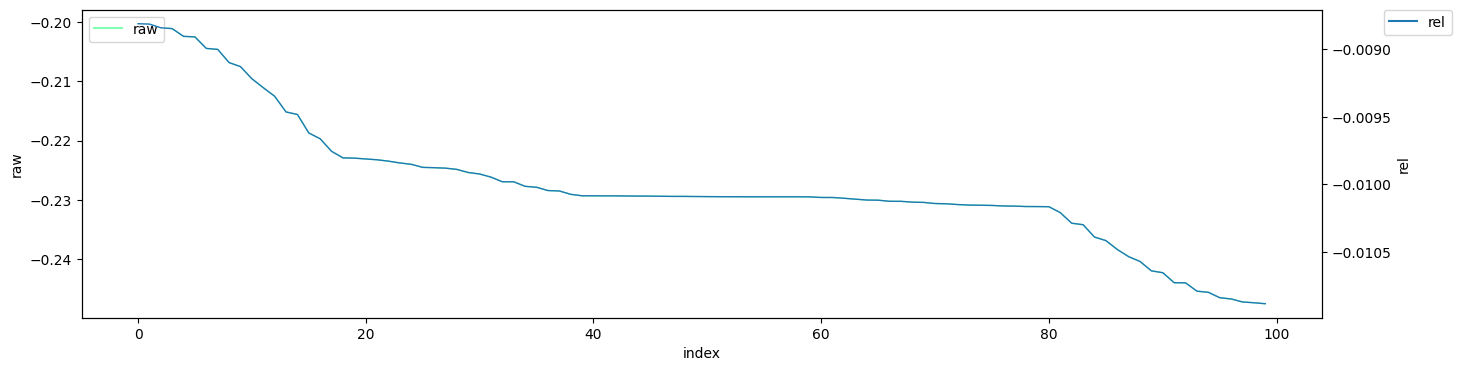

time: 3 s (started: 2022-10-31 18:16:39 +01:00)


In [21]:
# display (plots are on top of each other, see scaling on both y-axis)
pak.plot(df.raw, df.rel)

In [22]:
analyse()

,vmin,vmean,vmedian,vmax,vsum
col_name,,,,,
raw,-0.25,-0.23,-0.23,-0.20,-22.74
max_abs,-1.00,-0.92,-0.93,-0.81,-91.87
min_max,0.00,0.43,0.38,1.00,42.63
min_max_robust,-0.00,0.42,0.38,1.00,42.48
rel,-0.01,-0.01,-0.01,-0.01,-1.00


time: 82.3 ms (started: 2022-10-31 18:16:42 +01:00)


## scale method='mean'
* also called z-score
* one finds: `series_scaled.mean() == 0` 
* one finds: `series_scaled.std()  == 1` 
* a typical range for the scaled values is `-1.7..1.7`

In [23]:
# scale
df['mean_'] = pak.scale( df.raw, 'mean')

time: 46 ms (started: 2022-10-31 18:16:42 +01:00)


In [24]:
# assert
assert abs( df.mean_.mean() )    < 0.000000001   # mean() == 0
assert abs( df.mean_.std() - 1 ) < 0.000000001   # std()  == 1

time: 157 ms (started: 2022-10-31 18:16:42 +01:00)


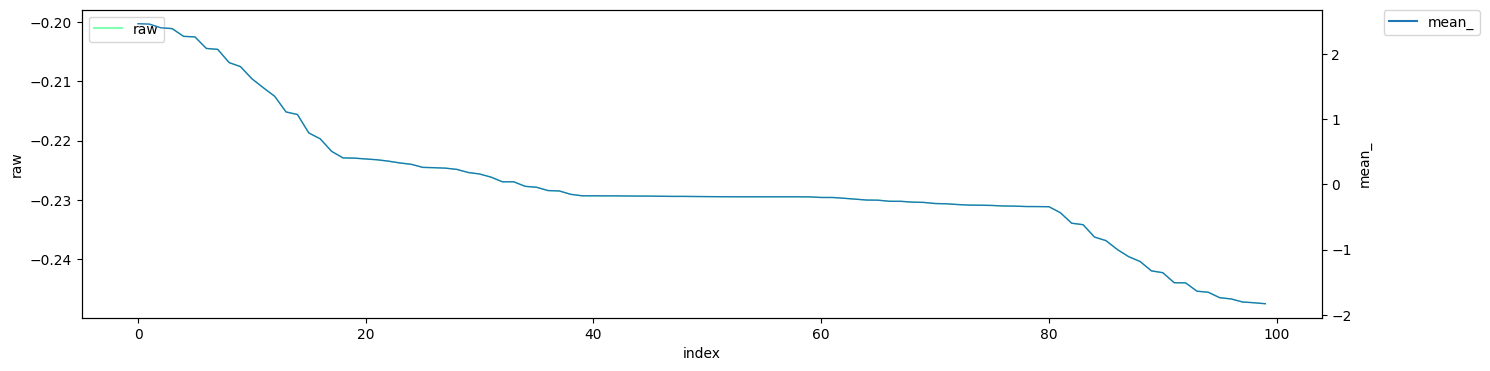

time: 2.96 s (started: 2022-10-31 18:16:42 +01:00)


In [25]:
# display (plots are on top of each other, see scaling on both y-axis)
pak.plot(df.raw, df.mean_ )

In [26]:
analyse()

,vmin,vmean,vmedian,vmax,vsum
col_name,,,,,
raw,-0.25,-0.23,-0.23,-0.20,-22.74
max_abs,-1.00,-0.92,-0.93,-0.81,-91.87
min_max,0.00,0.43,0.38,1.00,42.63
min_max_robust,-0.00,0.42,0.38,1.00,42.48
rel,-0.01,-0.01,-0.01,-0.01,-1.00
mean_,-1.83,0.00,-0.19,2.46,0.00


time: 73.9 ms (started: 2022-10-31 18:16:45 +01:00)


## scale method='median'
* like `mean`, but more robust against outliner values.
* one finds: `series_scaled.median() == 0` 
* a typical range for the scaled values is `-1..1`, 
  but the range can be much wider than with `mean`

In [27]:
# scale
df['median_'] = pak.scale( df.raw, 'median')

time: 39.4 ms (started: 2022-10-31 18:16:45 +01:00)


In [28]:
# assert
assert abs( df.median_.median() )  < 0.000000001   # median() == 0

time: 44.7 ms (started: 2022-10-31 18:16:46 +01:00)


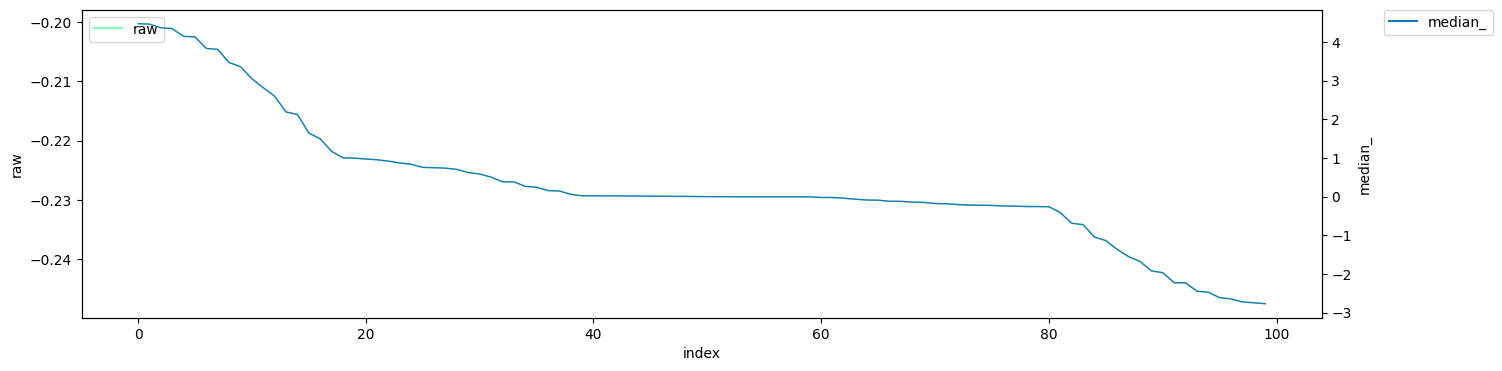

time: 3.36 s (started: 2022-10-31 18:16:46 +01:00)


In [29]:
# display (plots are on top of each other, see scaling on both y-axis)
pak.plot(df.raw, df.median_ )

In [30]:
analyse()

,vmin,vmean,vmedian,vmax,vsum
col_name,,,,,
raw,-0.25,-0.23,-0.23,-0.20,-22.74
max_abs,-1.00,-0.92,-0.93,-0.81,-91.87
min_max,0.00,0.43,0.38,1.00,42.63
min_max_robust,-0.00,0.42,0.38,1.00,42.48
rel,-0.01,-0.01,-0.01,-0.01,-1.00
mean_,-1.83,0.00,-0.19,2.46,0.00
median_,-2.77,0.32,0.00,4.47,31.54


time: 105 ms (started: 2022-10-31 18:16:49 +01:00)


## scale method='compare_median'
* scales `0..1` below median and `1..` above median 
* So you can multipy the scaled values by any factor, keeping the comparison to the median.
* one finds: all values < median are `0..1`
* one finds: all values == median are `1`
* one finds: all values > median are `> 1`
* `series_scaled.median()` will be very near `1`.
* unlike most other scalings, the plots do not lie on top of each other, but have a different shape

In [31]:
# scale
df['compare_median'] = pak.scale( df.raw, 'compare_median') 

time: 38.4 ms (started: 2022-10-31 18:16:49 +01:00)


In [32]:
# assert
assert df.compare_median.min() == 0

mask = (df.raw > df.raw.median())
assert (df[mask].compare_median > 1).all()

mask = (df.raw == df.raw.median())
assert (df[mask].compare_median == 1).all()

mask = (df.raw < df.raw.median())
assert (df[mask].compare_median <= 1).all()
assert (df[mask].compare_median >= 0).all()

time: 42.3 ms (started: 2022-10-31 18:16:49 +01:00)


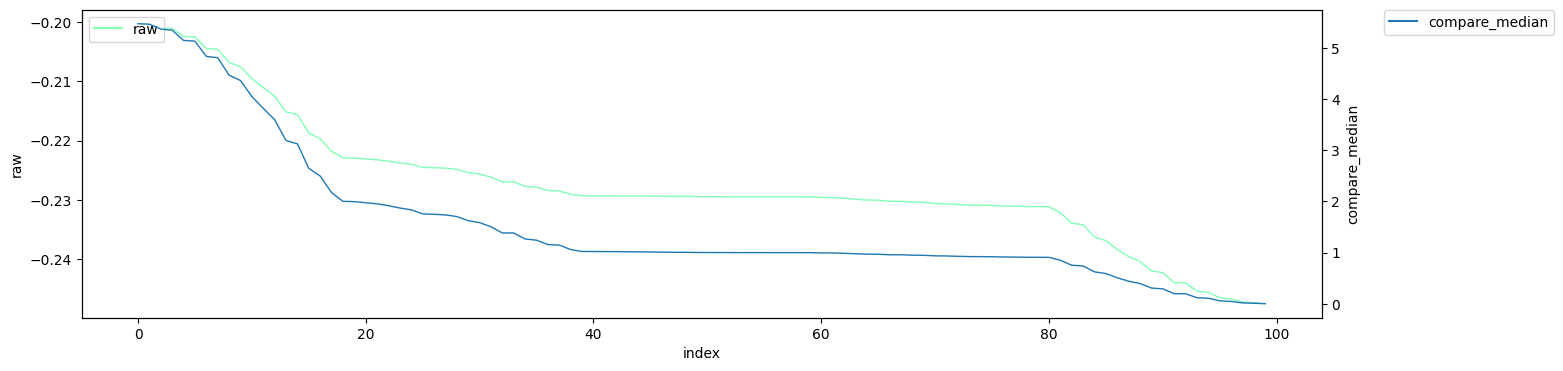

time: 3 s (started: 2022-10-31 18:16:49 +01:00)


In [33]:
# display
pak.plot(df.raw, df.compare_median )

In [34]:
analyse()

,vmin,vmean,vmedian,vmax,vsum
col_name,,,,,
raw,-0.25,-0.23,-0.23,-0.20,-22.74
max_abs,-1.00,-0.92,-0.93,-0.81,-91.87
min_max,0.00,0.43,0.38,1.00,42.63
min_max_robust,-0.00,0.42,0.38,1.00,42.48
rel,-0.01,-0.01,-0.01,-0.01,-1.00
mean_,-1.83,0.00,-0.19,2.46,0.00
median_,-2.77,0.32,0.00,4.47,31.54
compare_median,0.00,1.56,1.00,5.47,156.38


time: 85.3 ms (started: 2022-10-31 18:16:52 +01:00)


## scale method='rank'
* scales `0..1` (open interval)
* scales by rank
* distributes evenly over the interval, the original shape is destroyed. The plots do not lie on top of each other.
* if powerfactor == 1 one finds: `series_scaled.median() == 0.5` 
* additional parameter powerfactor deforms the scale, see example

In [35]:
# scale
df['rank1'] = pak.scale( df.raw, 'rank')

time: 32.7 ms (started: 2022-10-31 18:16:52 +01:00)


In [36]:
# assert
assert (df.rank1 > 0).all()
assert (df.rank1 < 1).all()

assert df.rank1.min() < 0.01
assert df.rank1.max() > 0.99
assert abs(df.rank1.quantile(0.5) - 0.5) < 0.02

time: 44.8 ms (started: 2022-10-31 18:16:52 +01:00)


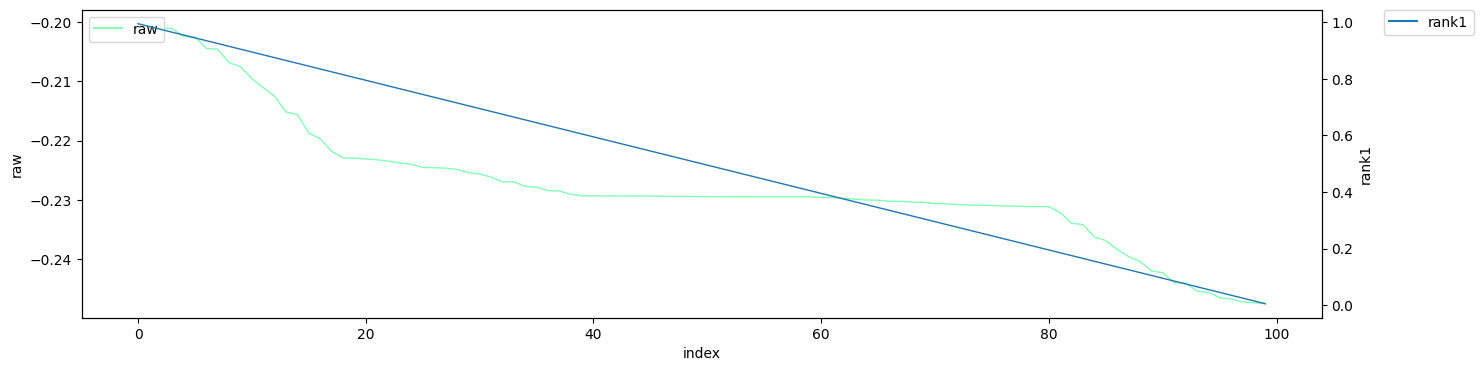

time: 2.96 s (started: 2022-10-31 18:16:52 +01:00)


In [37]:
# display
pak.plot( df.raw, df.rank1)

In [38]:
analyse()

,vmin,vmean,vmedian,vmax,vsum
col_name,,,,,
raw,-0.25,-0.23,-0.23,-0.20,-22.74
max_abs,-1.00,-0.92,-0.93,-0.81,-91.87
min_max,0.00,0.43,0.38,1.00,42.63
min_max_robust,-0.00,0.42,0.38,1.00,42.48
rel,-0.01,-0.01,-0.01,-0.01,-1.00
mean_,-1.83,0.00,-0.19,2.46,0.00
median_,-2.77,0.32,0.00,4.47,31.54
compare_median,0.00,1.56,1.00,5.47,156.38
rank1,0.01,0.50,0.50,0.99,50.00


time: 68.8 ms (started: 2022-10-31 18:16:55 +01:00)


In [39]:
# scale with powerfactor
df['rank3'] = pak.scale( df.raw, 'rank', powerfactor=3)

time: 34.4 ms (started: 2022-10-31 18:16:55 +01:00)


In [40]:
# assert
assert (df.rank3 >= 0).all()
assert (df.rank3 <= 1).all()

time: 39 ms (started: 2022-10-31 18:16:55 +01:00)


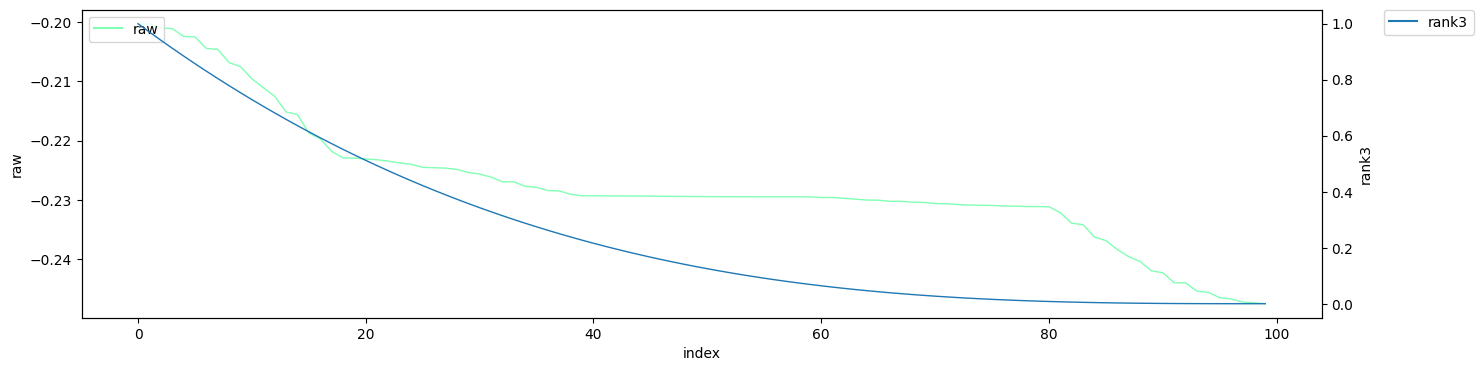

time: 3 s (started: 2022-10-31 18:16:56 +01:00)


In [41]:
pak.plot( df.raw, df.rank3)

In [42]:
analyse()

,vmin,vmean,vmedian,vmax,vsum
col_name,,,,,
raw,-0.25,-0.23,-0.23,-0.20,-22.74
max_abs,-1.00,-0.92,-0.93,-0.81,-91.87
min_max,0.00,0.43,0.38,1.00,42.63
min_max_robust,-0.00,0.42,0.38,1.00,42.48
rel,-0.01,-0.01,-0.01,-0.01,-1.00
mean_,-1.83,0.00,-0.19,2.46,0.00
median_,-2.77,0.32,0.00,4.47,31.54
compare_median,0.00,1.56,1.00,5.47,156.38
rank1,0.01,0.50,0.50,0.99,50.00


time: 113 ms (started: 2022-10-31 18:16:59 +01:00)


## scale method='random'
* scales randomly
* generates an ugly, krank scaling for testings

## Comparison

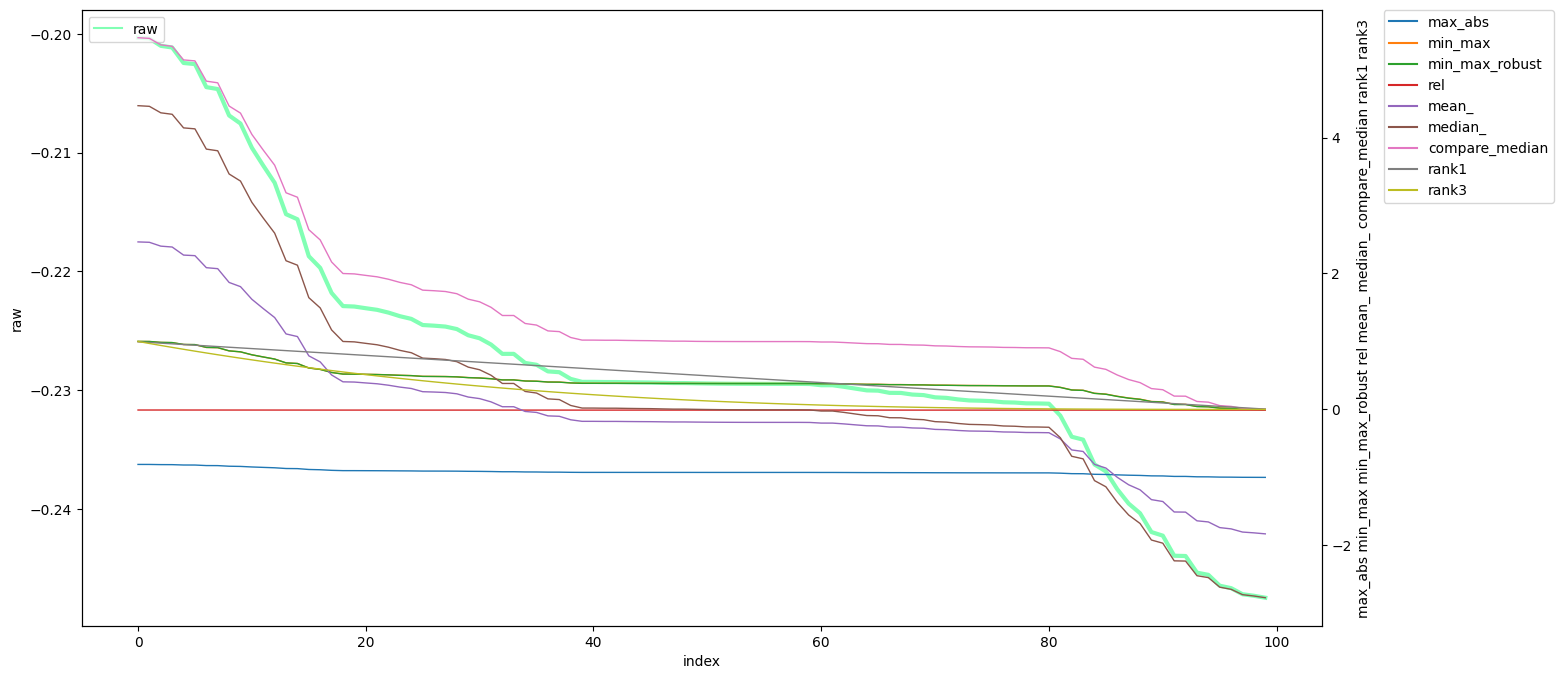

time: 5.91 s (started: 2022-10-31 18:16:59 +01:00)


In [43]:
spalten1 = ['raw']
spalten2 = list(analyse().index)[1:]
pak.plot( df[spalten1], df[spalten2], size=(16,8), line=(3,1))

In [44]:
analyse()

,vmin,vmean,vmedian,vmax,vsum
col_name,,,,,
raw,-0.25,-0.23,-0.23,-0.20,-22.74
max_abs,-1.00,-0.92,-0.93,-0.81,-91.87
min_max,0.00,0.43,0.38,1.00,42.63
min_max_robust,-0.00,0.42,0.38,1.00,42.48
rel,-0.01,-0.01,-0.01,-0.01,-1.00
mean_,-1.83,0.00,-0.19,2.46,0.00
median_,-2.77,0.32,0.00,4.47,31.54
compare_median,0.00,1.56,1.00,5.47,156.38
rank1,0.01,0.50,0.50,0.99,50.00


time: 83.3 ms (started: 2022-10-31 18:17:05 +01:00)
